## 0. 目的
　本実習では，デジタル数値データ解析の基本であるスペクトル解析ができるようになることを目的とする．
実際の時系列解析では，既存の解析プログラムを使用することもあるが，自らプログラムを作成して使用する場合も多い．自作プログラムがきちんと動作しているかをチェックするために，結果の分かっている時系列データを人工的に作り（Synthetic Dataと呼ばれる），それをプログラムで解析することで，解析プログラムが正しく動作しているかどうかを調べる．本実習ではこのSynthetic Dataの作成に関する実習も行う．
実習ではPythonを使用する．Pythonはプログラミング初心者でも扱いやすく，近年では自然科学分野でも広く使用されるようになっている．特にA領域関連では，地震波データ処理向けのライブラリが充実している．PythonはGoogleで用いられる三大言語の一つ（残りはJava, C++）である．大規模システムも構築でき，YouTube, Dropbox, Instagramなどでも採用されている．なお，Pythonの教科書として，中久喜(2016)をあげておく．

## 1. 時系列解析を行う上での計算言語
時系列解析を行う計算言語の主要なものを下記にまとめる．

|有償|無償|備考|
|:-|:-|:-|
|(Fortran, C/C++コンパイラ)<br>+シェルスクリプト|(Fortran, C/C++コンパイラ)<br>+シェルスクリプト<sup>\*1,*2</sup>|大規模複雑科学計算では独壇場|
|Excel<br>（表計算ソフト）|Calc（OpenOffice, <br>LibreOffice）|理系では使用頻度低い<br>大規模データには使えない|
|MATLAB<sup>\*2,*3</sup>|Octave<sup>\*2,*3</sup>|汎用性を重視|
|IDL<sup>\*2,*3</sup>|GDL<sup>\*2,*3</sup>|データ解析を目的として作られた対話型言語|
|S言語<sup>\*2,*3</sup>|R言語<sup>\*2,*3</sup>|統計解析を目的として作られた対話型言語|
| |Python<sup>\*3</sup>|対話型言語<br>扱いやすさ・可読性を重視<br>豊富なライブラリ|

<sup>\*1</sup> シェルスクリプトとして，C-shell系列（csh,tcsh,zsh）, B-shell系列（sh, bash, zsh）などが存在する．シェルスクリプトとコンパイラの違いは，シェルスクリプトの場合にはプログラムの命令列が逐次解釈されながら実行される (インタプリタ言語)のに対し、コンパイラの場合には実行前にソースコードを機械語に変換する手続が踏まれる点である．  
<sup>\*2</sup> 以前はインタプリタ言語では大規模データを扱うことができなかったが，最近ではかなり大量のデータも扱えるようになってきた．しかし，細かい処理や大規模計算を含んだ科学技術計算の場合にはC/C++, FORTRAN77/90/95＋シェルスクリプトでないと対応できない場合が未だに多い．  
<sup>\*3</sup> MATLAB/Octave, IDL/GDL, R, Pythonは対話型のシステムであるが，スクリプトを組むことにより，シェルスクリプトのように使うこともできる． 
MATLAB/Octaveは汎用性を重視しているので，行列計算，逆問題，統計解析，時系列解析などに用いるパッケージ関数（サブルーチン）・ライブラリが標準で豊富に準備されている．Rも元々は統計解析を念頭に作られた言語であったが，最近ではそれ以外のパッケージ関数・ライブラリも充実してきている．IDL/GDLはどちらかというとC/C++, Fortranの対話型という位置づけに近い．Pythonではサードパーティによる豊富なライブラリを活用することで広範かつ高速な解析が可能になる．
Pythonにはバージョン2系（2.x）と3系（3.x）があり，少し古い資料（Web）を見ると2系が使用されていることが多い．2系と3系では互換性がないことに注意が必要である．本演習では，Anaconda 2020.02に含まれるバージョン3.7を使用する．

## 2. 実習の準備
### 2.0 Anacondaのinstall（別紙参照、配布済み）

### 2.1 Pythonの実行方法
Pythonの実行には主に2つの方法がある．1つがメモ帳などのテキストエディタでプログラムを作成・保存し，コマンドラインでそれを実行する方法．2つ目が1行ごと対話的に実行する方法である．対話的に実行するには，Pythonの標準シェルよりも便利なIPythonがある．Jupyter Notebookを使えば，実行可能なIPythonのコードを埋め込んだ文章を作ることもできる．エディタとしてはMicrosoftが無償で提供しているVSCodeがおすすめである．
プログラミングを補助するためのソフトウェアとして統合開発環境（IDE）と呼ばれるものがある．IDEを用いることにより，コードの記述，ファイルの管理，実行・デバッグなどが容易になる．Python向けのIDEは有償や無償の物がいくつか存在するが，本演習では，Anacondaに含まれている無償のSpyderを用いる．
#### 2.1.1 Spyderの使い方
Spyderを起動し，「プロジェクト」 「新規プロジェクト」で，新しいプロジェクトを作成する．例えば，プロジェクト名「exercise」，位置「C¥Users¥[ユーザ名]¥spyder¥exercise」とする．これ以降，このフォルダにファイルを置いて作業を行う．プログラミングを行うには，「新規ファイル」でファイルを作成し（ファイル名は適当），テキストエディタにコードを書き，実行ボタンを押す．結果は右下のIPythonコンソールに表示される．また，Ipythonコンソールに直接入力して，対話的なプログラミングも可能である．
ファイルを新規作成すると，”# -*- coding: usf-8 -*-“や緑色のコメントが自動的に付けられるが，これらは消してもよいし，消さずにその下にプログラムを書いてもよい．

<img src="./image/spyder.png">
図1．Spyderの画面

### 2.2 ライブラリ
様々な機能を持ったプログラムをまとめた物をライブラリと呼ぶ．Python向けには豊富なライブラリが提供されており，ほとんど無償で利用することが可能である．主なものを以下に挙げる．便利なライブラリをうまく利用すれば効率の良いプログラミングができるが，必ず自分で挙動を確認し，できればブラックボックスのまま使わないことが望まれる．
- NumPy（ナムパイ，ナムピー，ナンパイ）  
数値計算に欠かせない．高速処理可能な配列や数学関数の提供．
- SciPy（サイパイ）  
Numpyに機能を追加したもの（内部でNumpyを読み込んでいる）．
- Matplotlib  
データプロット機能を提供．ツールキットをインストールすることにより，さらに高度できれいな図を作成できる（例えば，seaborn, ggplot, prettyplotlib）．
- Pandas  
データ解析ツールを提供．

## 2.3 グラフ描画
**（例1）** y=2x+1のグラフを描く  
（考え方）  
デジタルデータ(xi, yi)（i=1,2,…,N）の組を作成して，(xi, yi)-(xi+1, yi+1)間を直線で結ぶグラフを作る．定義域とサンプリング間隔は適当に定める  
（実行例）  
サンプリング間隔を0.5として定義域[0,10)での(xi ,yi),（i =0, 1, 2…, 19）	を作ってplot関数で描画

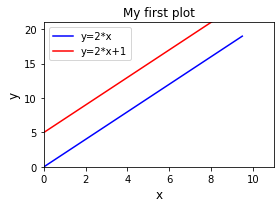

In [5]:
import matplotlib.pyplot as plt # matplotlibのpyplotを
                                  # pltと言う名前でインポート
import numpy as np          # numpyをnpという名前でインポート

x = np.arange(0, 10, 0.5)       # xは(10-0)/0.5 = 20要素のndarray（配列）
                    # 0~9.5までの値がセット

y1 = 2*x                # y1もxと同じ長さのndarray（配列）
y2 = 2*x + 5 # y2もxと同じ長さのndarray（配列）
plt.figure(figsize=(4,3))        # 図のサイズを指定可能
plt.plot(x,y1,color='blue', label ='y=2*x')   # プロット1
plt.plot(x,y2,color='red', label ='y=2*x+1')  # プロット2
plt.xlabel('x', fontsize=12)           # x軸のラベル
plt.ylabel('y', fontsize=12)           # y軸のラベル
plt.xlim(0,11) ; plt.ylim(0,21)        # x軸とy軸のレンジ
plt.xticks(np.arange(0,11,step=2))     # x軸のメモリ
plt.yticks(np.arange(0,21,step=5))     # y軸のメモリ
plt.title('My first plot')             # タイトル
plt.legend(loc='best')                  # loc=’best’にすると最適な場所に 
                                          # legendが置かれる
plt.tight_layout()              # グラフの位置やサイズを自動で調整
plt.savefig('fig1.png')         # 名前をつけて保存する
plt.show()                  # グラフを表示する

`x = np.arange(x1, x2, dx)`  
xに[x1, x2)の要素をdx間隔で格納する（x2は含まない）．xはNumPyの多次元配列であるndarray型である．x1を省略すると0から始まり，dxを省略すると1間隔になる．


`plt.plot(x, y)`  
x, yの要素(xi, yi)を線で結んだ2次元線グラフを作成する．xが省略された際はx=0, 1…, N-1（Nはyの要素の数）とみなす．x, yの次元は一致していなければならない※”matplotlib”でWeb検索するとわかるように，この他に散布図やヒストグラムをプロットするなど多様な機能がある．


`plt.savefig`  
指定した拡張子から画像形式は自動判断される（例ではPNG形式）．pdfを指定するとベクトル形式の図が作成され，拡大しても劣化しない図が作れる．SpyderのIPythonコンソールの図を右クリックで”Save Image As…”や、右上のPlotウィンドウからでも保存可能である．

### 2.4 ファイル入出力
ここではアスキー形式のテキストファイルの読み込み・書き込みを行う．大容量のデータを扱う場合には，バイナリ形式を用いた方が高速であり，ファイルサイズも小さくできる．バイナリ形式とはコンピュータが処理するために2進数化されたファイルであり，人間には読めない形式で普通のエディタでは開けない．また，変数（オブジェクト）をそのままバイナリ形式で保存することも可能である（シリアライズ）．

**（例2）** Pythonで作成したデータをテキストファイルとして保存する．  
例1で作成したx, yを保存する．特に保存場所を指定しなければSpyderの「実行」>「設定」の中の「作業ディレクトリ」にある場所（プロジェクトのフォルダ）に保存される． 
（実行例）：例1に引き続き

In [10]:
np.savetxt('test.txt', np.c_[x,y1,y2], fmt='%.2f', delimiter='\t')

`np.c_[x, y]`  
xとyのndarrayを列方向に結合したndarrayを作成．


`fmt=’%.2f’`  
小数点以下第2位まで表示する．


`delimiter=’\t’`  
列と列の間の区切りをタブにする．


test.txtというファイルが作成され，3列の数値データが入っていることを確認．

**（例3）** 作成したtest.txtを読み込み，ndarrayを作成する．  
（実行例）：例2に引き続き

In [13]:
data = np.loadtxt('test.txt', skiprows=0)
x3 = data[:, 0]
y3 = data[:, 1]

`data`  
dataは20行x 3列のndarray


`x3 = data[:, 0]`  
dataの0列目をx3に代入する．


`skiprows`  
指定した行数まで読み込まない
`np.loadtxt('test.txt', delimiter='\t')`としてもよい
タブ区切りを明示．省略するとデフォルト値（delimiter=None）になり，タブやスペースを意味するため，この場合は省略可能．


### 2.5 ループ制御
**（例4）** 1から100までの奇数を出力する．繰り返し処理にはforループやwhileループを用いる．  
（実行例）

In [15]:
# for ループ
for i in range(1,100):          #任意の回数を繰り返す
    if i%2 != 0 : # i/2の余りが0でなければ以下を実行(＊この行の冒頭はインデント)
        print(i)            #(この行の冒頭は2回インデント)
        
# while ループ
i=1
while i<100:                #この条件を満たす間は繰り返す
    if i%2 != 0 : # i/2の余りが0でなければ以下を実行(この行の冒頭はインデント)
        print(i)        #(この行の冒頭は2回インデント)
    i = i + 1           #(この行の冒頭はインデント)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


`range(最初の値、最後の値、増加量)`  
最初の値から「最後の値―増加量」までの数列を作成する．最後の引数を省略すると増加量は１．また，最初と最後の引数を省略すると０から「最後の値―１」までの数列を作成する．

Python では複合文 （Compound statement）の一行の終わりにコロン(:)が必須である．  
＊インデントはブロックを明示している．また，改行は文と文の区切りである．

## 3. Synthetic Dataの作成
- 実際のデータは様々なシグナル・ノイズが含まれており、作成したプログラムをいきなり実行しても、プログラムが正しく動いているか確認できないことが多い。
- そのような場合、人工的に作成したデータ（人工データ）を用いて、プログラムの検証を行う。（正解を知っているときに、正解が導き出せるか）
- あるいは何らかの物理パラメータを推定したいときに、その手法がパラメータ推定にどの程度有効か検証する際に用いる。

### 3.1 三角関数
（レポート課題１でcos波にノイズを加えて人工データを作成することを念頭に、まずはsin波の作成を行う）  
**（例5）** sin(x) を定義域[0,2π]で描画する．サンプリング間隔をπ/8とする．  
（実行例）

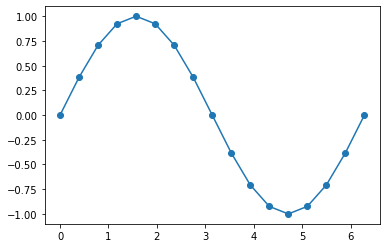

In [16]:
import numpy as np
import matplotlib.pyplot as plt

dx = np.pi / 8
x = np.arange(0, 2*np.pi+dx, dx)
y = np.sin(x)
plt.plot(x, y,marker='o',linestyle='-') #markerを用いたプロット
plt.show()

`x = np.arange(0, 2*np.pi+dx, dx)`  
np.arange関数は終わりの値は含まないため，0から2π+π/8までを指定．

### 3.2 データの補間
**（例6）** 例5で描いたグラフを1000 等間隔の点に補間し，元のサンプリングデータと補間したデータをプロットする．  
(実行例)（例5）に続いて

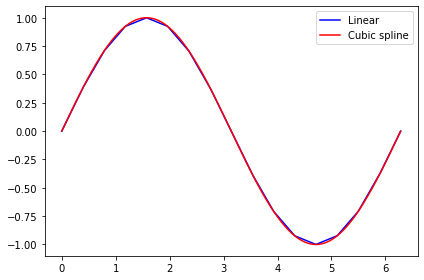

In [18]:
import scipy.interpolate as interp
n = 1000
x_new = np.linspace(0,2*np.pi,n)

# 線形補間
f_lin = interp.interp1d(x,y,kind='linear')
sin_lin = f_lin(x_new)
plt.plot(x_new,sin_lin,linestyle='solid',color='blue', label='Linear')

# 3 次スプライン補間
f_cub = interp.interp1d(x,y,kind='cubic')
sin_cub = f_cub(x_new)
plt.plot(x_new,sin_cub,linestyle='solid',color='red',label='Cubic spline')
plt.legend(loc='best')
plt.tight_layout()
plt.show()                         

`from scipy.interpolate as interp`  
Scipyの補間(interpolation)のパッケージをinterpという名前で定義する．
参考：http://www.turbare.net/transl/scipy-lecture-notes/intro/scipy.html
`x = np.linspace(x1,x2,n)`  
xに区間[x1,x2]をn等分に分けた数列を格納する．
`v = interp.interp1d(x,y,kind='cubic')`  
1次元のxに対するyの値がある時、y＝f（x）になる補間関数を求める．kindは補間方法を表し，‘linear’，‘nearest’，‘zero’，‘slinear’，‘quadratic’，‘cubic’，‘previous’，‘next’がある．

### 3.3 一様乱数, 正規乱数
**（例7）** 定義域[-3,3)での一様乱数を500個発生させ，ヒストグラムを作成する．乱数の数を大きくしていくとどうなるか．  
（考え方）標準で準備されている[0,1)の一様乱数を用いて作成する．
まず[0,6)の乱数を500個作り，3を引く．  
（実行例）

(array([26., 15., 30., 23., 17., 20., 31., 19., 20., 29., 28., 18., 28.,
        28., 23., 37., 23., 25., 35., 25.]),
 array([-2.9965401 , -2.69857591, -2.40061172, -2.10264752, -1.80468333,
        -1.50671914, -1.20875495, -0.91079076, -0.61282657, -0.31486237,
        -0.01689818,  0.28106601,  0.5790302 ,  0.87699439,  1.17495858,
         1.47292277,  1.77088697,  2.06885116,  2.36681535,  2.66477954,
         2.96274373]),
 <a list of 20 Patch objects>)

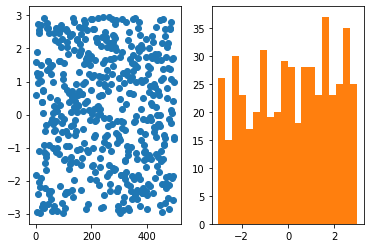

In [19]:
import numpy as np
import matplotlib.pyplot as plt

n = 500
x = 6*np.random.rand(n) - 3
#プロット領域を1行2列にわける
fig, (left, right) = plt.subplots(ncols=2)  
left.scatter(np.arange(n), x)       #左側に散布図
right.hist(x, bins=20)
right.hist(x, bins=20)          #右側に20等分したヒストグラム

`np. random.rand(n)`  
要素数n個の[0,1)の一様乱数をもつndarrayを作成．

`乱数列の初期化`  
プログラミングで生成される擬似乱数は，「シード」を元に乱数生成器を初期化して生成される．numpy.randomは，何も指定しない場合には，OSの乱数生成器による乱数か時刻に基づいたシードによる初期化が行われる．つまり，上記実行例は，実行のたびに結果が異なる．同じ乱数列を生成したい場合には，乱数生成前に，np.random.seed(SEED)を記述する．ここで，SEEDには，0から232-1までの整数を入れる．

**（例8）**正規分布(-5.8, 0.1225)に従う乱数（正規乱数(-5.8, 0.1225(=(0,35)2))）を500個発生させ，ヒストグラムを作成する．  
（実行例）

(array([ 2.,  0.,  5.,  2.,  9., 14., 23., 32., 44., 66., 58., 60., 63.,
        49., 27., 26.,  8.,  7.,  4.,  1.]),
 array([-6.99565434, -6.88646829, -6.77728223, -6.66809617, -6.55891011,
        -6.44972405, -6.340538  , -6.23135194, -6.12216588, -6.01297982,
        -5.90379377, -5.79460771, -5.68542165, -5.57623559, -5.46704954,
        -5.35786348, -5.24867742, -5.13949136, -5.0303053 , -4.92111925,
        -4.81193319]),
 <a list of 20 Patch objects>)

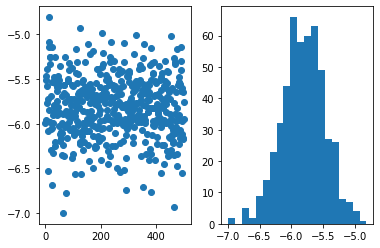

In [20]:
import numpy as np
import matplotlib.pyplot as plt

n = 500
x = np.random.normal(-5.8, 0.35, n)
fig, (left, right) = plt.subplots(ncols=2)
left.scatter(np.arange(n),x)
right.hist(x, bins=20)

## 4. スペクトル解析
### 4.1 FFT関数（Fast Fourier Transform; 高速フーリエ変換）
**（例9）**周期20秒・振幅1.5 Vのsin波（電圧信号）が1 Hzサンプリング，データ長100秒記録されている．このデータに高速フーリエ変換（FFT）を施す．   
（実行例）

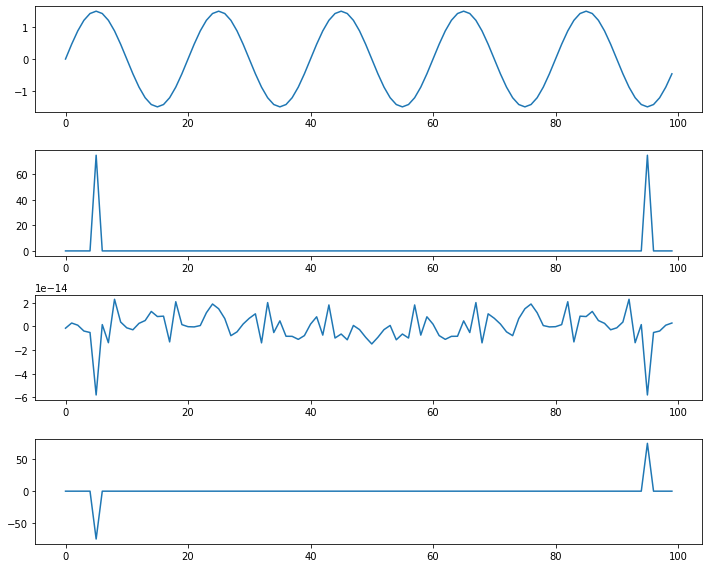

In [22]:
from scipy import fft       #scipyのfftを使う．
import numpy as np
import matplotlib.pyplot as plt

T = 100             #データ長（秒）
dt = 1              #サンプリング間隔（秒）
nt = int(T/dt)          #サンプル数．小数点以下を切り捨て整数にする．
t = np.arange(0, T, dt) #時間軸
y = 1.5*np.sin(2*np.pi*t/20)    
Y = fft.fft(y)      #フーリエ変換の実行

plt.figure(figsize=(10,8))  #図のサイズ
plt.subplot(4,1,1)      #4行1列の領域の1行目
plt.plot(t,y)           #時系列をプロット
plt.subplot(4,1,2)      #4行１列の領域の2行目
plt.plot(np.absolute(Y))    #絶対値をプロット
plt.subplot(4,1,3)      #4行1列の領域の3行目
plt.plot(np.real(Y))        #実部をプロット
plt.subplot(4,1,4)      #4行1列の領域の4行目
plt.plot(np.imag(Y))        #虚部をプロット
plt.tight_layout()      #ラベルが重ならないようにする

`from scipy import fft`  
NumPyでもFFTは提供されているが，ここではSciPyのfftpackを使う．SciPyはNumPyを含むため，fftpackを使うことを明示的に宣言する．より高速にFFTが実行できる pyFFTW というライブラリも存在するが，ライセンスの関係でSciPyには組み込まれていない（補足5参照）．


`Y = fft.fft(y)`  
Yはデータyの離散フーリエ変換であり，各要素が複素数のndarray．yの長さが2のべき乗であるときにもっとも速い．


### 4.2 離散フーリエ変換の定義
**（例10）** 例9で行ったFFT結果に横軸・縦軸と単位・凡例をつける．  
（考え方）フーリエ変換・逆変換の定義式

\begin{equation}X(f) = \int_{-\infty}^\infty x(t) e^{-i2\pi ft}dt, x(t) = \int_{-\infty}^\infty X(f)e^{i2\pi ft}df \end{equation}
これに対応する離散フーリエ変換（DFT: Discrete Fourier Transform）・逆変換は，
\begin{equation} X_k = \sum_{n=0}^{N-1}x_n e^{-i2\pi f_kt_n}\Delta t, x_n = \sum_{k=0}^{N-1}X_k e^{i2\pi f_kt_n}\Delta f \end{equation}
となる．ここで，$t_n=n\Delta t$は時刻，$f_k=k\Delta f$は周波数，$\Delta t=T/N$はサンプリング間隔, $\Delta f=1/T$は周波数刻み，$T$は時間長，$N$はデータ点数である．この計算を高速に行うアルゴリズムをFFTと言う．実際のFFT計算においては，使用するソフトウェアやライブラリにより，DFTの定義が異なるため注意．PythonのFFTでは，
\begin{equation} X_k'=\sum_{n=0}^{N-1}x_ne^{-i2\pi f_kt_n}, x_n=\frac{1}{N}\sum_{k=0}^{N-1}X_k'e^{i2\pi f_kt_n}\end{equation}
と定義しているため，フーリエ変換を計算する場合には以下の変換が必要．
\begin{equation}X_k=X_k'\Delta t = X_k'\frac{T}{N}\end{equation}
※単位について．フーリエ変換の次元は「（時系列の次元）×（時間）」，あるいは，「（時系列の次元）/（周波数）」となる．  
※周波数成分について．離散フーリエ変換は，実際にはフーリエ級数展開であるため，基本周波数1/Tとその整数倍のみで構成される．そのため，周波数刻みは$\Delta f=1/T$である．$X_k$は周波数$f_k=k\Delta f= k/T (k=0,1,...,N-1)$ に対応する．  
（実行例）：例9に引き続き

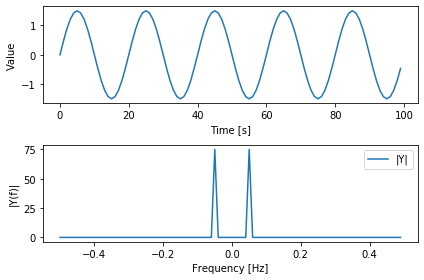

In [27]:
Y = Y*dt                    #フーリエ変換の定義
f = fft.fftfreq(nt, d=dt)           #周波数軸の作成
f = fft.fftshift(f)         #ゼロを中心に並べ替え
Y = fft.fftshift(Y)         #ゼロを中心に並べ替え
plt.figure()                    #新しい図を作成
plt.subplot(2,1,1); plt.plot(t, y, label='y')   #時系列をプロット
plt.xlabel('Time [s]')              #x軸ラベルの設定
plt.ylabel('Value')             #y軸ラベルの設定
plt.subplot(2,1,2); plt.plot(f, np.absolute(Y), label='|Y|')
                        #絶対値をプロット
plt.xlabel('Frequency [Hz]')            #x軸ラベルの設定
plt.ylabel('|Y(f)|')                #y軸ラベルの設定
plt.legend()                    #凡例を記載
plt.tight_layout()                  			

`f = fft.fftfreq(nt, d=dt)`  
データ数nt, 間隔dt秒, 時間長T秒のフーリエ変換に対応する周波数のndarrayを作成．周波数刻みをdf = 1/T = 1/(nt*dt)とすると，  
（ntが偶数の時）[0, 1, …, nt/2-1, -nt/2, …, -1] *df  
（ntが奇数の時）[0, 1, …, (nt-1)/2, -(nt-1)/2, …, -1] * df  
となる．  
つまり，ntが偶数のときには，配列インデックスが nt/2 の要素がナイキスト周波数(負)(=-fn=-nt*df/2)に対応する．一方，ntが奇数の時には，配列インデックスが (nt-1)/2 = nt//2 の要素が表現される最大の周波数(nt-1)*df/2 = (nt//2)*df < fnとなる．


`f = fft.fftshift(f)`
周波数ゼロが中心になるように並べ替える．  
（ntが偶数の時）[-nt/2, …, -1, 0, 1, …, nt/2-1] *df  
（ntが奇数の時）[-(nt-1)/2, …, -1, 0, 1, …, (nt-1)/2] * df  
となる（図2参照）．

### 4.3 フーリエ変換の離散化と周期性
**（例11）** 例10の離散フーリエ変換結果について，周波数成分を理解する．  
（考え方）  
離散フーリエ変換では，時間・周波数が離散化されているが，これはそれぞれ周波数・時間方向に周期的な信号を仮定したことと等価．

<img src="./image/fig2.png">
図2. DFTの周期性．


サンプリング定理から，元信号はナイキスト周波数fNより高周波数の成分を持たない（持たないようにアンチエイリアシングフィルタをかける）ため（補足1），DFTで得られるスペクトルは-fN≦f≦fNの情報を持つ．また，実信号（全て実数の信号）の場合，フーリエ変換の実部は偶関数，虚部は奇関数となる．ゼロ周波数に対してスペクトルは対称となるため，0≦f≦fNの範囲のみを表示することが多い．  
（実行例）：例10に引き続き

Text(0, 0.5, '|Y(f)|')

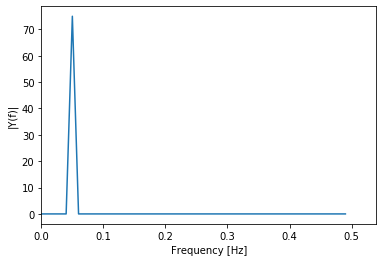

In [29]:
plt.figure()
plt.plot(f, np.absolute(Y))
plt.xlim(xmin=0)    #プロット範囲の最小値を0とする
plt.xlabel('Frequency [Hz]'); plt.ylabel('|Y(f)|')

### 4.4 パワースペクトル密度関数
**（例12）** 例11の離散フーリエ変換からパワースペクトル密度関数を計算する．  
（考え方）  
パワースペクトル（パワースペクトル密度関数）の定義
\begin{equation}P(f) = \lim_{T\rightarrow\infty}\frac{X^*(f)X(f)}{T}\end{equation}
パーセバルの定理から，
\begin{equation}\lim_{T\rightarrow\infty}\frac{1}{T}\int_0^Tx^2(t)dt=\int_{-\infty}^{+\infty}P(f)df\end{equation}
左辺は全エネルギー（振幅の2乗の時間積分）を継続時間で割ったものなので平均パワーを表す．そのため，右辺のP(f)dfは，平均パワーに対するf~f+dfの周波数成分の寄与を表す．パワースペクトル密度と呼ばれるのはそのためである．  
<img src="./image/fig3.png">  
図3．両側・片側パワースペクトルとパワースペクトル密度関数の意味．


※片側スペクトルと両側スペクトルについて．実信号のパワースペクトルはゼロ周波数に対して対称なため，正周波数のみでパワースペクトルを定義して，元のパワースペクトルを2倍することがある．正周波数のみで定義されたパワースペクトルのことを片側スペクトルといい，正・負両方の周波数で定義されたものを両側スペクトルという．どちらを使うかで大きさが2倍異なるので注意．  
※単位について．パワースペクトル密度関数は「（時系列の次元の2乗）/（周波数）」の次元を持つ．  
（実行例）：例11に引き続き

Text(0, 0.5, 'PSD [V^2/Hz]')

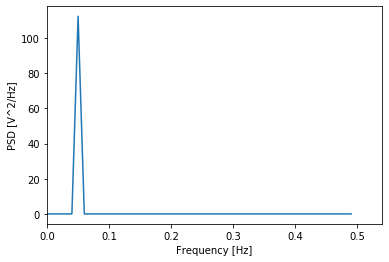

In [31]:
P = 2*np. conj(Y)*Y/T           #パワースペクトル密度関数
plt.figure()
plt.plot(f, np.absolute(P))  #パワースペクトル密度関数をプロット
plt.xlim(xmin=0)
plt.xlabel('Frequency [Hz]'); plt.ylabel('PSD [V^2/Hz]')

### 補足1：サンプリングとエイリアシング
自然界の信号のほとんどは連続的なアナログ信号であるが，計算機での信号処理に適したデジタル信号に変換するため，ある一定間隔での離散時間の信号として取り出すことが多い．この行為をサンプリング（標本化）という．また，サンプリング間隔の逆数をサンプリング周波数という．対象とする信号に対しサンプリング周波数が十分でないと，測定したい信号を捉えきれなくなるだけでなく，元信号には含まれていないはずの偽信号が現れてしまう．この現象をエイリアシング（折り返し雑音）と呼ぶ．動画を通してプロペラ機や自動車を見たときに，高速回転するプロペラやタイヤホイールが実際よりゆっくり回ったり逆回転したりして見えることがあるが，これも動画が多数の静止画のパラパラ漫画であることに起因したエイリアシングの一種である．
 
<img src="./image/fig4.png">  
図4．エイリアシング


元信号に含まれる最大周波数がサンプリング周波数の半分より小さければ，サンプリング信号から元信号を復元できる（サンプリングの定理）．サンプリング周波数の半分の周波数をナイキスト周波数と呼ぶ．例えば，サンプリング周波数100Hzで正しく捉えられる信号は50Hzまでである．逆に，100Hzの信号（1秒間に100回振動する波）を捉えるには，最低でも200Hzのサンプリング周波数が必要である．実際の場合には，現象に対して十分高いサンプリング周波数に設定するか，ローパスフィルタ（アンチエイリアシングフィルタ）を用いて予めナイキスト周波数以上の成分を取り除いておく必要がある．

### 4.5 窓関数
**（例13）** 周期20秒・振幅1 Vのsin波（電圧信号）が0.5 Hzサンプリングで記録されている．データ長が ①100秒, ②110秒, ③110秒のデータにHanning窓をかけた場合についてパワースペクトル密度を計算し，比較する．  
（考え方）  
無限に続く信号に対して定義されるはずのフーリエ変換に対し，実際の解析では有限時間で積分を打ち切らなければならない．これは無限に続く信号に矩形窓を掛け算していることになり，スペクトルは矩形窓のスペクトルの影響を受けて本来の周波数の周りに漏れ出す（スペクトル漏れ）．矩形窓は両端で急激に0となるため，矩型窓のスペクトルは高周波数まで大きな裾野（サイドローブ）を持つ．サイドローブを小さくするには，両端で緩やかに0になるような窓関数を使えば良い．代表的な窓関数として，Hanning窓，Hamming窓，Cosine taper窓，Blackman窓などがあり，場合によって使い分ける．矩形窓，Hanning窓は以下の通り．
\begin{eqnarray}W_{rect}(t)=\left\{\begin{array} 11 & 0\leq t\leq T \\ 0 & \text{otherwise}\end{array}\right., W_{hann}(t)=\frac{1}{2}\left(1-\cos\frac{2\pi t}{T}\right)\end{eqnarray}

<img src="./image/fig5.png">  
図5．窓関数による切り出しと不連続
 
<img src="./image/fig6.png">  
図6．窓関数（時間長T）のスペクトル


スペクトル漏れは以下のように考えることもできる．有限の長さの時系列からフーリエ変換によってスペクトルを求める場合は，暗黙のうちに信号が周期的に繰り返すと仮定している．しかし，有限区間を無理やり切り出して繰り返しつなげると両端に不連続が生じる．この不連続をフーリエ級数で表現するためには，本来の周波数以外に広い周波数成分が必要になる．Hanning窓などを使って緩やかにつなげることで，不連続の影響が軽減する．


※窓関数による振幅の補正．
両端で緩やかに0になる窓関数をかけることでサイドローブの影響を軽減できるが，時系列の振幅が元時系列に比べて小さくなるため，パワースペクトル密度を実際より小さく見積もってしまう．そのため，スペクトル振幅を補正する必要がある．統計的に定常的な信号の場合，元時系列に窓関数をかけた時系列のパワーは，窓関数のパワーpw倍になると期待される．
\begin{equation}p_w=\frac{1}{T}\sum_{n=0}^{N-1}w^2_n\Delta t=\frac{1}{N}\sum_{n=0}^{N-1}w^2_n\end{equation}
$p$は，Hanning窓の場合は0.375，Hamming窓では1691/4232，Cosine taper窓（前後10%幅の場合）では0.875となる．窓関数をかけて計算したパワースペクトルをこの値で割ることで振幅を補正する．

（実行例）

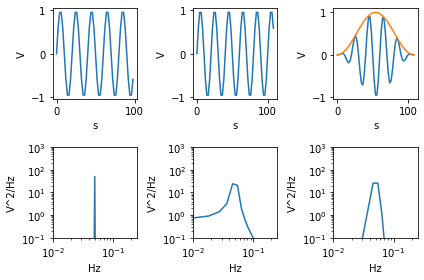

In [32]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

#サンプリング周期・時間長の設定
dt = 2; fn = (1/dt)/2
T1 = 100
N1 = int(T1/dt); t1 = np.arange(0,N1*dt,dt)
f1 = fft.fftshift(fft.fftfreq(N1, d=dt))
T2 = 110
N2 = int(T2/dt); t2 = np.arange(0,N2*dt,dt)
f2 = fft.fftshift(fft.fftfreq(N2, d=dt))
#データ作成・パワースペクトル密度の計算
y1 = np.sin(2*np.pi*0.05*t1)
P1 = 2*np.square(np.absolute(fft.fft(y1))*dt)/T1
P1 = fft.fftshift(P1)
y2 = np.sin(2*np.pi*0.05*t2)
P2 = 2*np.square(np.absolute(fft.fft(y2))*dt)/T2
P2 = fft.fftshift(P2)
w = np.hanning(N2)
y3 = y2*w
P3 = 2*np.square(np.absolute(fft.fft(y3))*dt)/(T2*0.375)
P3 = fft.fftshift(P3)
#時系列・スペクトルをプロット
plt.subplot(2,3,1); plt.plot(t1,y1); plt.xlabel('s'); plt.ylabel('V')
plt.subplot(2,3,2); plt.plot(t2,y2); plt.xlabel('s'), plt.ylabel('V')
plt.subplot(2,3,3); plt.plot(t2,y3,t2,w); plt.xlabel('s'); plt.ylabel('V')
plt.subplot(2,3,4); plt.loglog(f1,P1); plt.axis([1e-2,fn,1e-1,1e3])
plt.xlabel('Hz'); plt.ylabel('V^2/Hz')
plt.subplot(2,3,5); plt.loglog(f2,P2); plt.axis([1e-2,fn,1e-1,1e3])
plt.xlabel('Hz'); plt.ylabel('V^2/Hz')
plt.subplot(2,3,6); plt.loglog(f2,P3); plt.axis([1e-2,fn,1e-1,1e3])
plt.xlabel('Hz'); plt.ylabel('V^2/Hz')
plt.tight_layout()

`w = np.hanning(N)`  
NサンプルのHanning窓のndarrayを作成．周期はN-1．
 

`plt.loglog(x,y)` 
両対数グラフを作成する．範囲の広いデータを見るのに便利．


### 4.5 順変換と逆変換
**（例14）** フーリエ変換で求めたスペクトルをそのまま逆変換すると元の時系列に戻ることを確認する．また，スペクトルの一部を取り除いて逆変換することで，フィルタリングになることを確認する．


f1=0.2Hz，f2=0.08Hz の2つの周波数成分を持つ時系列x(t) = 5cos(2πf1t)+3cos(2πf2t -π/4)が，50Hzサンプリング，データ長150秒で記録されている．この時系列にはニング窓をかけてFFTした後，そのまま逆変換することで元の時系列に戻ることを確かめる．また，スペクトルの0.15Hz未満の部分をすべて0としてから逆変換をすることで，元の時系列にハイパスフィルタをかけたものになっていることを確認する．（注意）これは，ゼロ位相のBoxcar型のハイパスフィルタを適用したことに相当するが，通常の時系列解析ではバタワース型がよく用いられる．   
（実行例）

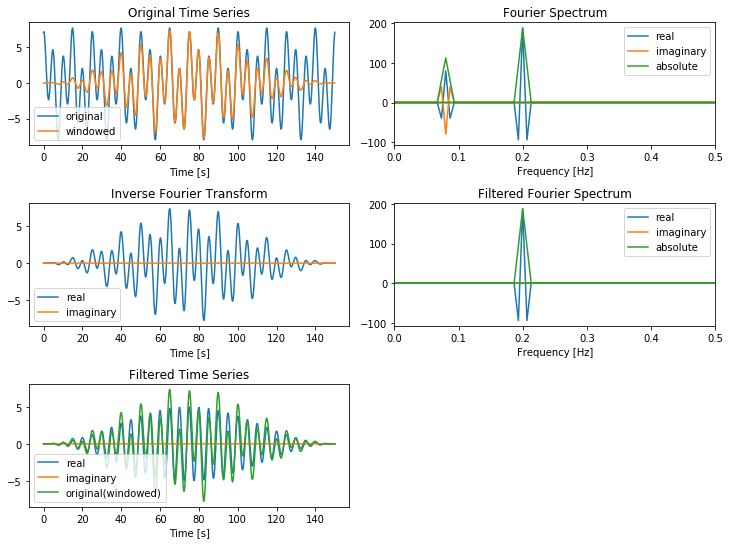

In [33]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

dt = 0.02; T = 150; N = int(T/dt); t = np.arange(0,N*dt, dt)
f1 = 0.2; f2 = 0.08; f = fft.fftfreq(N, d=dt)
w = np.hanning(N) # Hanning窓

# 2つの周波数成分が含まれる時系列
x = 5*np.cos(2*np.pi*f1*t) + 3*np.cos(2*np.pi*f2*t-np.pi/4)

# 時系列のフーリエ変換
xw = x*w # Hanning窓をかける
y = fft.fft(xw)*dt 

# 逆フーリエ変換
x_ifft = fft.ifft(y)/dt

# スペクトルに対して0.15Hz未満の成分を0にする
y_filt = np.copy(y)
y_filt[np.where(abs(f)<0.15)] = 0

# 修正したスペクトルの逆フーリエ変換
x_filt = fft.ifft(y_filt)/dt

# プロット
plt.figure(figsize=(10.24, 7.68))
plt.subplot(3,2,1)
plt.plot(t, x, label='original'); plt.xlabel('Time [s]')
plt.plot(t, xw, label='windowed')
plt.title('Original Time Series')
plt.legend()

plt.subplot(3,2,2)
plt.plot(f, y.real, label='real'); plt.xlabel('Frequency [Hz]')
plt.plot(f, y.imag, label='imaginary')
plt.plot(f, np.abs(y), label='absolute')
plt.xlim([0,0.5])
plt.title('Fourier Spectrum')
plt.legend()

plt.subplot(3,2,3)
plt.plot(t, x_ifft.real, label='real'); plt.xlabel('Time [s]')
plt.plot(t, x_ifft.imag, label='imaginary')
plt.legend()
plt.title('Inverse Fourier Transform')

plt.subplot(3,2,4)
plt.plot(f, y_filt.real, label='real'); plt.xlabel('Frequency [Hz]')
plt.plot(f, y_filt.imag, label='imaginary')
plt.plot(f, np.abs(y_filt), label='absolute')
plt.xlim([0,0.5])
plt.title('Filtered Fourier Spectrum')
plt.legend()

plt.subplot(3,2,5)
plt.plot(t, x_filt.real, label='real'); plt.xlabel('Time [s]')
plt.plot(t, x_filt.imag, label='imaginary')
plt.plot(t, xw, label='original(windowed)')
plt.title('Filtered Time Series')
plt.legend()
plt.tight_layout()

## 5. 自己相関関数と相互相関関数
### 5.1 自己相関関数とパワースペクトル
**（例15）** ホワイトノイズ（平均0・分散一定のランダムノイズ）を作成し，自己相関関数を計算する．  
（考え方）  
自己相関関数の定義
\begin{equation}C(\tau)=\lim_{T\rightarrow\infty}\frac{1}{T}\int_0^Tx(t)x(t+\tau)dt\end{equation}
自分自身と自分自身をτだけずらしたものの積の期待値．このずらし量τをラグと呼ぶ．自己相関関数とパワースペクトルはフーリエ変換の関係にある（ウィナー・ヒンチンの定理）．完全にランダムな信号の場合，隣のサンプルと全く関係がないため，自己相関関数はデルタ関数となる．デルタ関数のフーリエ変換は1なので，パワースペクトルは全周波数で2（片側スペクトル）となる．このような信号をホワイトノイズ（白色雑音）と呼ぶ．

<img src="./image/fig7.png">  
図7．自己相関関数


また，自己相関関数を規格化した自己相関係数は$R(\tau)=C(\tau)/C(0)$ と定義される．

（実行例）  

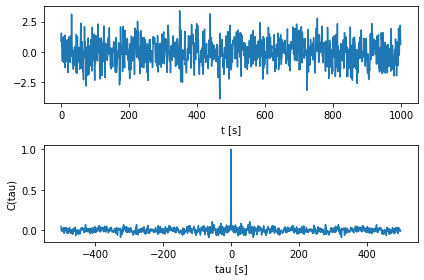

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#パラメータ設定
dt = 1; T = 1000; N = int(T/dt); t=np.arange(0,T,dt)    
x = np.random.normal(0, 1, N)           #正規乱数列はホワイトノイズ
ac = np.correlate(x, x, mode='same')        #自己相関関数
ac /= ac[N//2]                  #規格化 //:切り捨て除算
tau = np.arange(-N*dt/2,N*dt/2,dt)      #ラグ
plt.subplot(2,1,1); plt.plot(t,x); plt.xlabel('t [s]')
plt.subplot(2,1,2); plt.plot(tau,ac)
plt.xlabel('tau [s]'); plt.ylabel('C(tau)')
plt.tight_layout()

`np.correlate(x, y, mode='same') `
xとyの相互相関を計算．mode=’same’はxと同じ長さのndarrayを返す．modeはこの他にfullとvalidがある．
\begin{equation}C_k=\sum_nx_{n+k}y^*_k\end{equation}
mode=’full’（デフォルト）：（xの要素数）+（yの要素数）-1の要素数を返す．  
mode=’same’：xとyの要素数が多い方の要素数を返す．  
mode=’valid’：xとyの重なる部分だけで相関を計算する．  


### 5.2 スペクトルの推定誤差
**（例16）** 例15で作成したホワイトノイズのパワースペクトルを計算する．  
（考え方）  
ホワイトノイズのパワースペクトル密度は全周波数で一定になるはずである．しかし，作成した一つのデータからFFTを使ってパワースペクトル密度を計算すると一定の値を取らずに大きくばらつく．これはホワイトノイズのような確率過程（ランダムな変動）は統計量として扱う必要があるためであり，この場合，母集団から抽出した標本時系列から本来のスペクトルを「推定」しなければならない．確率過程に対するパワースペクトルはアンサンブル平均<>を用いて定義される．
\begin{equation}P(f)=\lim_{T\rightarrow\infty}\left<\frac{X^*(f)X(f)}{T}\right>\end{equation}
一つの標本時系列のみから「計算」したパワースペクトルは，その一標本時系列のスペクトルを表すだけで，現象が持つ本来のスペクトルの特徴を表しているかはわからない．具体的には，一標本時系列をFFTして直接計算したパワースペクトルの推定誤差は100%になる．スペクトルの推定誤差を小さくするためには，複数測定のアンサンブル平均（統計平均）をとればよい．実際の解析においては，一つの時系列を分割して計算したパワースペクトルを平均（分割平均）するか，周波数領域でパワースペクトルの平滑化（周波数平滑）を行うことでスペクトル推定誤差を小さくすることが多い．
実際に誤差を計算する場合には，等価自由度を考える必要がある．パワースペクトルは，スペクトルの実部と虚部の二乗和であるため，自由度が2のカイ二乗分布に従う．そのため，一つの時系列をm個に分割した場合には，パワースペクトルの等価自由度は2mである．ハニングフィルタをm回作用させた場合には，2m+1個のスペクトル成分の重み付き平均と考えられるため，パワースペクトルの等価自由度は2(2m+1)となる．

### 補足2：量子化と量子化誤差
アナログ信号をデジタル信号に変換するためは，サンプリング（標本化）による時間軸の離散化に加えて，振幅の離散化を行う必要がある．この行為を量子化と呼ぶ．
無限桁数を持つアナログ値を有限桁数で打ち切って表現すると考えれば良い．量子化を行う際に重要なパラメータとして入力レンジと分解能がある．入力レンジは入力できる信号の最大入力範囲で，±10 [V]などと表される．分解能は入力レンジを何分割して振幅を離散的に表すかを決める値で，16bit, 24bitなどと表される．例えば入力レンジ±10 [V]・分解能16bitの場合，20 [V]の幅を216=65536分割することになり，表現できる最小の値は3.05x10-4 [V]である．この値を，量子化単位，LSB(Least Square Bit)，ビット重みなどと呼ぶ．また，量子化によりアナログ値とデジタル値には差が生まれるが，この誤差を量子化誤差という．量子化誤差は一様乱数で近似できるため，ホワイトノイズであると考えられる．
 
（実行例）  

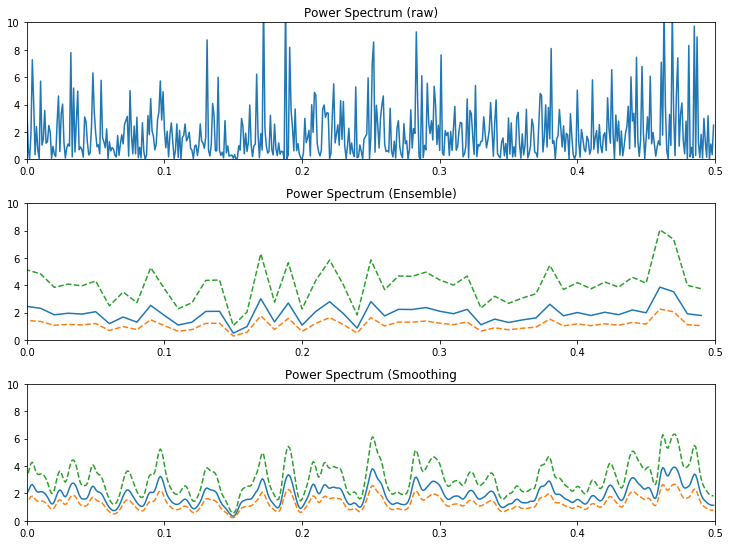

In [35]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
from scipy import stats

interval = 0.95 # 信頼区間

#ホワイトノイズの作成
dt = 1.0; T = 1000.0; N = int(T/dt); fn=1/(dt*2)
x = np.random.normal(0, 1, N)

#生のパワースペクトル
P = 2*np.square(np.absolute(fft.fft(x))*dt)/T
P = fft.fftshift(P)

#分割平均（10(ndiv)分割）
ndiv = 10
Tdiv = T//ndiv; Ndiv = N//ndiv; Pdiv = np.zeros((ndiv, Ndiv)) # // 切り捨て除算
Pens = np.zeros(Ndiv)
for i in range(ndiv):
    xdiv = x[i*Ndiv:(i+1)*Ndiv]
    Pens += 2*np.square(np.absolute(fft.fft(xdiv))*dt)/Tdiv
Pens = fft.fftshift(Pens/ndiv)

# 信頼区間95%のカイ二乗値を求めるために，SciPyのstatsを使う
dof = 2*ndiv # 自由度
chi1, chi2 = stats.chi2.interval(alpha=interval, df=dof)
lbens = dof*Pens/chi2
ubens = dof*Pens/chi1

#周波数平均（Hanningフィルタ）
nfilter = 10
Q = P
Psmooth = np.zeros(N)
for j in range(nfilter):
    for i in range(1,N-1):
        Psmooth[i] = (Q[i-1]+2*Q[i]+Q[i+1])/4
    Psmooth[0] = (Q[0]+Q[1])/2
    Psmooth[N-1] = (Q[N-2]+Q[N-1])/2
    Q = Psmooth
    
# 信頼区間推定
dof = 2*(2*nfilter+1) # 自由度
chi1, chi2 = stats.chi2.interval(alpha=interval, df=dof)
lbsmooth = dof*Psmooth/chi2
ubsmooth = dof*Psmooth/chi1

    
#プロット
plt.figure(figsize=(10.24, 7.68))
f = fft.fftshift(fft.fftfreq(N, d=dt))
fens = fft.fftshift(fft.fftfreq(Ndiv, d=dt))

plt.subplot(3,1,1)
plt.plot(f,P); plt.axis([0,fn,0,10]); plt.title('Power Spectrum (raw)')

plt. subplot(3,1,2)
plt.plot(fens,Pens)
plt.plot(fens,lbens,linestyle='--'); plt.plot(fens,ubens,linestyle='--')
plt.axis([0,fn,0,10])
plt.title('Power Spectrum (Ensemble)')

plt.subplot(3,1,3)
plt.plot(f,Psmooth)
plt.plot(f,lbsmooth,linestyle='--'); plt.plot(f,ubsmooth,linestyle='--')
plt.axis([0,fn,0,10])
plt.title('Power Spectrum (Smoothing')
plt.tight_layout()

`for i in range(10) `  
range(10)で作成した要素（0, 1, …, 9）を順番に i に代入し，ループ処理する．Pythonではループは処理速度が遅いため，できるだけ使わないようにする．例えば，周波数平均（Hanning窓を10回）の部分は畳み込みを使用して以下のように書き換えることが可能である．
```
w = np.zeros(3)
w[0] = 0.25
w[1] = 0.5
w[2] = 0.25
Pave = P.copy()
for i in range(10):
    Pave = np.convolve(Pave, w, mode='same')
```
この例の場合，ループを使用した場合より畳み込みを用いた場合の方が数十倍程度高速である．また，要素ごとの処理を，ループを使わずに行うために，NumPyにはvectorizeやfrompyfuncといった関数が用意されている．引数で渡されたndarrayに要素ごとの処理をし，ndarrayを返す関数を作成することができる（ユニバーサル関数，ufunc）．例で扱ったnp.sinやnp.squareなどは，全要素に対する処理を行う．

### 5.3 直接法と相関法
（例17） 5.1で触れた通り，ウィナー・ヒンチンの定理として，パワースペクトル密度関数と自己相関関数はフーリエ変換の関係にある．元の時系列をフーリエ変換してパワースペクトルを計算する手法は直接法と呼ばれ，元の時系列の自己相関関数のフーリエ変換から計算する場合は相関法と呼ばれる．ここでは，ある時系列から2つの方法でパワースペクトルを計算し，比較する．  
（実行例）

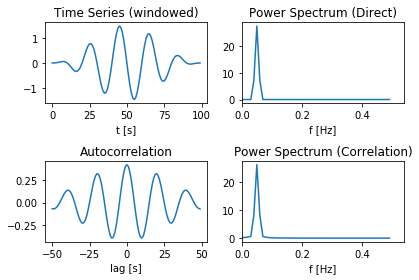

In [37]:
from scipy import fft      
import numpy as np
import matplotlib.pyplot as plt

T = 100             #データ長（秒）
dt = 1              #サンプリング間隔（秒）
nt = int(T/dt)          #サンプル数．小数点以下を切り捨て整数にする．
t = np.arange(0, T, dt) #時間軸
y = 1.5*np.sin(2*np.pi*t/20)  #時系列の作成
w = np.hanning(nt)
y = y*w

# 直接法によるパワースペクトル密度関数
Y = fft.fft(y)*dt
Y = fft.fftshift(Y)         #ゼロを中心に並べ替え
P = 2*np. conj(Y)*Y/T           #パワースペクトル密度関数

# 相関法によるパワースペクトル密度関数
acf = np.correlate(y, y, mode='same')*dt/T # 自己相関関数
Pacf = 2*fft.fft(acf)*dt 
Pacf = fft.fftshift(Pacf)

tau = np.arange(-nt*dt/2,nt*dt/2,dt) # 自己相関関数の軸（ラグ）
f = fft.fftshift(fft.fftfreq(nt, d=dt))         #周波数軸の作成
plt.figure()
plt.subplot(2,2,1); plt.plot(t, y); plt.xlabel('t [s]'); plt.title('Time Series (windowed)')
plt.subplot(2,2,2); plt.plot(f, np.abs(P)); plt.xlabel('f [Hz]'); plt.title('Power Spectrum (Direct)'); plt.xlim(xmin=0)
plt.subplot(2,2,3); plt.plot(tau, acf); plt.xlabel('lag [s]'); plt.title('Autocorrelation')
plt.subplot(2,2,4); plt.plot(f, np.abs(Pacf)); plt.xlabel('f [Hz]'); plt.title('Power Spectrum (Correlation)'); plt.xlim(xmin=0)
plt.tight_layout()

### 5.3 相互相関関数とクロススペクトル
**（例18）**x(t) = 5cos(2πf1t)+3cos(2πf2t -π/4), y(t) = 3cos(2πf1t -π/6)+2cos(2πf2t), f1=0.2Hz，f2=0.08Hzという2つの信号が50Hzサンプリング，データ長1分で記録されている．この時，xとyの相互相関関数とクロススペクトルを計算する．また，得られたクロススペクトルからコヒーレンスと位相差を表示する．  
（考え方）  
相互相関関数の定義
\begin{equation}C_{xy}(\tau)=\lim_{T\rightarrow\infty}\frac{1}{T}\int_0^Tx(t)y(t+\tau)dt\end{equation}
また，相互相関関数を$\sqrt{C_{xx}(0)C_{yy}(0)}$で規格化したものを相互相関係数$R(\tau)$と定義する．
\begin{equation}R_{xy}(\tau)=C_{xy}(\tau)/\sqrt{C_{xx}(0)C_{yy}(0)}\end{equation}
相互相関係数は-1から1までの値を取り，2つの信号が時間遅れ$\tau$を持ってどれくらい類似しているかを示す．$x(t)$と$y(t+\tau)$が完全に一致する場合は1，全くバラバラの場合は0となる．相関係数が1に近ければ正の相関，-1に近ければ負の相関，0に近ければ無相関という．


自己相関関数とパワースペクトルの関係と同様に，相互相関関数のフーリエ変換としてクロススペクトルが定義される．
\begin{equation}P_{xy}(f)=\int_{-\infty}^{+\infty}C_{xy}(t)e^{-i2\pi ft}dt\end{equation}
また，クロススペクトルはフーリエ成分を用いて以下のように表せる．
\begin{equation}P_{xy}(f)=\lim_{T\rightarrow\infty}\left<\frac{X^*(f)Y(f)}{T}\right>\end{equation}
クロススペクトルは複素数となるため，振幅と位相に対応するものとしてコヒーレンス$Coh(f)$とフェイズ$\theta(f)$を定義する．
\begin{equation}Coh(f)=\frac{|P_{xy}(f)|}{\sqrt{P_{xx}(f)P_{yy}(f)}}, \theta(f)=\tan^{-1}\frac{\text{Im}[P_{xy}(f)]}{\text{Re}[P_{xy}(f)]}\end{equation}
コヒーレンスは$-1\leq Coh(f)\leq 1$の値をとり，2つの信号の同じ周波数成分同士の類似度を表す．フェイズは2つの信号の同じ周波数成分同士の位相差を表わす．ただ一つの時系列から計算したコヒーレンスは必ず1になってしまう．これは，ただ一つの時系列では2つの信号の同じ周波数成分の位相ずれに意味があるのかがわからないためである．パワースペクトル推定と同様に，コヒーレンス計算にはクロススペクトルとパワースペクトルの統計平均・分割平均・周波数平滑が必要である．  
（実行例）

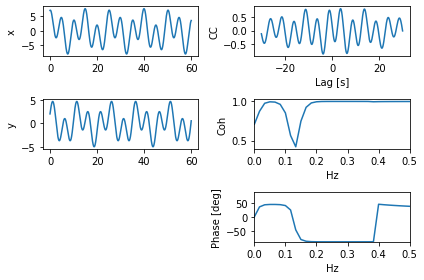

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

#Synthetic data作成
dt = 0.02; T = 60; N = int(T/dt); t = np.arange(0,N*dt, dt)
f1 = 0.2; f2 = 0.08

x = 5*np.cos(2*np.pi*f1*t) + 3*np.cos(2*np.pi*f2*t-np.pi/4)
y = 3*np.cos(2*np.pi*f1*t-np.pi/2) + 2*np.cos(2*np.pi*f2*t)

#相互相関関数
cxy = np.correlate(x, y, mode='same')
cxx = np.correlate(x, x, mode='same')
cyy = np.correlate(y, y, mode='same')
cxy /= np.sqrt(cxx[N//2]*cyy[N//2])
tau = np.arange(-N*dt/2, N*dt/2, dt)        #ラグ

w = np.hanning(N)
X = fft.fft(x*w)*dt; Y = fft.fft(y*w)*dt
Pxy = fft.fftshift(np.conj(X)*Y/T)
Pxx = fft.fftshift(np.conj(X)*X/T)
Pyy = fft.fftshift(np.conj(Y)*Y/T)

#Hanning窓でスペクトルの平滑化
w = np.array([0.25, 0.5, 0.25])
for i in range(10):
    Pxy = np.convolve(Pxy, w, mode='same')
    Pxx = np.convolve(Pxx, w, mode='same')
    Pyy = np.convolve(Pyy, w, mode='same')
#クロススペクトル
coh = np.absolute(Pxy)/np.sqrt(np.absolute(Pxx)*np.absolute(Pyy))
phase = np.angle(Pxy, deg=True)

#プロット
f = fft.fftshift(fft.fftfreq(N, d=dt))
plt.subplot(3,2,1); plt.plot(t,x); plt.ylabel('x')
plt.subplot(3,2,3); plt.plot(t,y); plt.ylabel('y')
plt.subplot(3,2,2); plt.plot(tau,cxy)
plt.xlabel('Lag [s]'); plt.ylabel('CC')
plt.subplot(3,2,4); plt.plot(f,coh); plt.xlim([0,0.5])
plt.xlabel('Hz'); plt.ylabel('Coh')
plt.subplot(3,2,6); plt.plot(f,phase)
plt.axis([0,0.5,-90,90]); plt.xlabel('Hz')
plt.ylabel('Phase [deg]')
plt.tight_layout()

## 6. 実際のスペクトル解析（レポート課題3）
（考え方）  
実際のスペクトル解析は以下の手順で行うことが多い．

1.	トレンド除去
1.	窓関数をかける
1.	FFT
1.	パワースペクトル密度
1.	窓関数の補正
1.	平均化（統計平均・分割平均・周波数平滑）  
※実データを扱う際には，FFTを行う前にデータから平均とトレンドを予め取り除く必要がある．平均やトレンドに含まれる長周期成分が高周波成分に漏れ出してスペクトルを歪めてしまうためである．Scipyにdetrendという関数が用意されている．


`from scipy import signal`  
`y = signal.detrend(x)`  
データxから1次トレンドを除去したndarrayを返す．オプションでtype=’constant’とすると，xの平均値を取り除く．

## 7.  参考文献
（50音順）  
- アミット・サハ（黒川利明訳），「Pythonからはじめる数学入門」，オライリー・ジャパン，2016
- 石川聡彦，「Pythonで動かして学ぶ! あたらしい深層学習の教科書 機械学習の基本から深層学習まで」，翔泳社，2018
- 伊理正夫・藤野和建，「数値計算の常識」，共立出版，1985.
- 大和田勇人・金森克俊，「Pythonで始めるプログラミング入門」，コロナ社，2015
- 尾崎統・北川源四郎，「時系列解析の方法」，朝倉書店，1998
- 得丸英勝・添田喬・中溝高好・秋月影雄，「計数・測定　ランダムデータ処理の理論と応用」，培風館，1982
- 中久喜健司，「科学技術計算のためのPython入門」，技術評論社，2016
- 林真．「科学技術計算で使うPython」，工学社，2016
- 日野幹夫，「スペクトル解析」，朝倉書店，1977
- プレス他（丹慶勝市他訳），「ニューメリカルレシピ・イン・シー」，技術評論社，1994
- ベンダット・ピアソル（得丸英勝他訳），「ランダムデータの統計的処理」，培風館，1976
- 三谷政昭・辻井重雄，「ディジタルフィルタデザイン」，昭晃堂，1987


### 補足3：機能の分割化
これまでの例ではプログラムを一つのまとまりとして記述した．しかし，プログラムが長くなる大規模な計算を行う場合には，修正箇所を見つけるのが大変であり，一つの変数の修正がプログラム全体に影響してしまうなど，メンテナンスが難しくなる．そこで，クラスや関数を用いることで，プログラムの機能を分割する．例15で示したホワイトノイズのスペクトル計算コードは次のように書き換えることが可能である．ここでは，ホワイトノイズ生成，パワースペクトル計算，プロットをそれぞれ関数に分け，mainでそれらを呼び出して使用している．また，このコードを例えば，module1.pyという名前で保存すれば，他のコードからでも import module1と書けば関数を使用することができる．このようなファイルはモジュールと呼ばれ，これまで使用したnumpyやscipyなどのライブラリも多数のモジュールで構成されている．また，Pythonはオブジェクト指向言語であるため，クラスやメソッドを定義することができる．これらの説明は長くなるのでここでは行わないが，興味のある人は中久喜（2016）を読むとよい．  
（関数の使用例）

In [ ]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

def makeWhiteNoise(N):
    x = np.random.normal(0, 1, N)
    return(x)

def calPSD(x, dt, T):
    P = 2*np.square(np.absolute(fft.fft(x))*dt)/T
    P = fft.fftshift(P)
    return(P)

def calPSDDiv(x, dt, T, N, nofdiv):
    Tdiv = int(T/nofdiv)
    Ndiv = N//nofdiv
    Pdiv = np.zeros(Ndiv)
    for i in range(nofdiv):
        xdiv = x[i*Ndiv: i*Tdiv+Ndiv]
        Pdiv += calPSD(xdiv, dt, Tdiv)
    Pdiv = fft.fftshift(Pdiv/nofdiv)
    return(Pdiv)

def calPSDAve(P, nofhanning):
    w = np.array([0.25, 0.5, 0.25])
    Pave = P.copy()
    for i in range(nofhanning):
        Pave = np.convolve(Pave, w, mode='same')
    return(Pave)

def plotResult(dt, T, P, Pdiv, Pave, N, nofdiv):
    Ndiv = N//nofdiv
    fn = 1/(dt*2)
    f = fft.fftshift(fft.fftfreq(N, d=dt))
    fdiv = fft.fftshift(fft.fftfreq(Ndiv, d=dt))
    plotResult1(f, P, fn, 1)
    plotResult1(fdiv, Pdiv, fn, 2)
    plotResult1(f, Pave, fn, 3)
    plt.tight_layout()
    
def plotResult1(f, P, fn, index):
    plt.subplot(3, 1, index)
    plt.plot(f, P)
    plt.axis([0, fn, 0, 10])

if __name__ == '__main__':
    dt = 1; T = 1000; N = int(T/dt)
    x = makeWhiteNoise(N)       #ホワイトノイズの作成
    P = calPSD(x, dt, T)        #生のパワースペクトル
    #分割平均（10分割）
    nofdiv = 10
    Pdiv = calPSDDiv(x, dt, T, N, nofdiv)
    #平滑化
    Pave = calPSDAve(P, 100)
    #プロット
    plotResult(dt, T, P, Pdiv, Pave, N, nofdiv)

`if __name__ == ‘__main__’:`  
このファイルがメイン実行ファイルとして呼ばれた場合，これ以降の部分が実行される．つまり，他のファイルから呼び出されたきには実行されない．

`インデント`  
Pythonではインデントが意味を持つ．同じインデントが変わるところまでを関数と定義する．一般に，半角スペース4つを1単位にすることが推奨されている．


### 補足4：csvファイルの読み込み

地物実験ではロガーによってはcsvファイルで出力されることがある。以下ではcsvファイルの読み込みの例を記載する。（データの例として2018年地物実験II期の3班の地震計記録を使用させていただいた）

In [ ]:
import pandas as pd         #pandas:計算パッケージ データの成形に便利
import matplotlib.pyplot as plt

#csvファイル(「,」カンマ区切りのファイル)を取得する
df=pd.read_csv('test_seismogram.csv',
names = ('Second','μs','UD','EW','NS'))
#列に名前を付けておくと後で便利。元のデータは数字のみ
print(len(df))      #データの長さを表示

print(type(df))  
df              #出力, 1kHzサンプリング

#0行目(秒)と1行目(μs)を結合して新しい列の作成
print(type(df['Second'][0]))
print(type(df['μs'][0]))
df['μs']=df['μs'].astype('str')         #同じ型にして足し合わせる
df['Second μs']=df['Second']+'.'+df['μs']
df['Second μs']=pd.to_datetime(df['Second μs']) 
#datetime型(時刻の情報を持つ)に変換する
df.set_index('Second μs', inplace=True)     #インデックスを変更する

#横軸時刻でプロットする
plt.figure(figsize=(16,10))

plt.subplot(3,1,1,label='UD')
plt.plot(df['UD'])
plt.grid()
plt.legend()

plt.subplot(3,1,2,label='NS')
plt.plot(df['NS'])
plt.grid()
plt.legend()

plt.subplot(3,1,3,label='EW')
plt.plot(df['EW'])
plt.grid()
plt.legend()

plt.show()

 
### 補足5：様々なFFT
この演習ではSciPyのFFTを使用したが，世の中には様々なFFTのライブラリが存在しており，計算速度もそれぞれ異なる．以下にいくつか例を挙げる．

In [39]:
# 長さが8,192のランダムなデータのFFTを10,000回繰り返す

import numpy as np
import scipy
import time
import pyfftw

seed = 1
n = 8192
ntry = 10000

# numpyのFFT
start = time.time()
np.random.seed(seed)
for i in range(ntry):
    xn = np.random.rand(n)-0.5
    yn = np.fft.fft(xn)
time_numpy = time.time() - start

# scipyのFFT
start = time.time()
np.random.seed(seed)
for i in range(ntry):
    xs = np.random.rand(n)-0.5
    ys = scipy.fft.fft(xn)
time_scipy = time.time() - start

# pyfftwによるFFT
xf = pyfftw.empty_aligned(n, dtype='complex128')
yf = pyfftw.empty_aligned(n, dtype='complex128')
fft_pyfftw = pyfftw.FFTW(xf, yf)
start = time.time()
np.random.seed(seed)
for i in range(ntry):
    xf[:]= np.random.rand(n)-0.5 
    fft_pyfftw(xf)
time_pyfftw = time.time() - start

# pyfftwによるFFT（簡単な書き換えによる）
# scipy.fftをpyfftw.interfaces.scipy_fft.fftに置き換える
pyfftw.interfaces.cache.enable()
start = time.time()
np.random.seed(seed)
for i in range(ntry):
    xfi = np.random.rand(n)-0.5
    yfi = pyfftw.interfaces.scipy_fft.fft(xfi)
time_pyfftw_interface = time.time() - start

print('numpy: %.3f s' % time_numpy)
print('scipy: %.3f s' % time_scipy)
print('pyfftw: %.3f s' % time_pyfftw)
print('pyfftw_interface: %.3f s' % time_pyfftw_interface)

ModuleNotFoundError: No module named 'pyfftw'

**実行結果（例）**  
numpy: 1.822 s  
scipy: 1.537 s  
pyfftw: 1.081 s  
pyfftw_interface: 1.417 s  

### 補足5：ループの高速化
Pythonではループの計算が他の言語と比べて遅いと言われている．そのため，要素を一つ一つループで計算するのではなく，できるだけ一度に配列全体に処理を行うようなベクトル計算を行った方がよい．以下の例では，xとyという１次元（長さ100000）のndarrayに対して z=x*y+x+yを求めるサンプルである．処理を100回繰り返し，１回にかかる平均計算時間を調べる．この例では，普通にベクトル演算するよりもNumbaというライブラリのJITコンパイラ（実行時コンパイラ）を用いた場合が最も速い結果となった．ちなみに，jit部分のループの読み出しは，最初の１回はコンパイル作業があるため時間がかかる．この例では，100回の処理の平均を調べているので，あまり影響がない．一方，自分でユニバーサル関数を作成するnp.frompyfuncでは劇的な速度の向上は見られなかった．どの方法が最適かはケースバイケースであるため，計算に時間がかかる場合には様々な方法を試してみると良い．

In [ ]:
import time
import numpy as np
import numba
import matplotlib.pyplot as plt
 
n = 100000 # 配列の長さ
nave = 100 # 平均を計算する処理回数
 
@numba.jit('f8[:](f8[:],f8[:])')
def loop_jit(x, y):
    z = np.zeros(n)
    for i in range(n):
        z[i] = x[i]*y[i]+x[i]+y[i]
    return(z)
 
def ufuncloop(x,y):
    z = x*y + x + y
    return z
 
func = np.frompyfunc(ufuncloop, 2, 1)
 
x = np.arange(n)*1.0
y = np.arange(n)*2.0

lapsetime = {}

# 普通のループ
start = time.time()
for i in range(nave):
    z = np.zeros(n)
    for j in range(n):
        z[j] = x[j]*y[j] + x[j] + y[j]
lapsetime['loop'] = (time.time() - start)/nave

# jit
start = time.time()
for i in range(nave):
    #z = np.zeros(n)
    z = loop_jit(x, y)
lapsetime['jit'] = (time.time() - start)/nave

# frompyfunc
start = time.time()
for i in range(nave):
    z = func(x, y)
lapsetime['frompyfunc'] = (time.time() - start)/nave

# ベクトル演算
start = time.time()
for i in range(nave):
    z = x * y + x + y
lapsetime['vector'] = (time.time() - start)/nave
    
# 結果の表示
for key in lapsetime:
    print(key + ': %.5f s (%.2f)' % (lapsetime.get(key), lapsetime.get('loop')/lapsetime.get(key)))
    

**実行結果例**  
loop: 0.09625 s (1.00)  
jit: 0.00010 s (960.43)  
frompyfunc: 0.01707 s (5.64)  
vector: 0.00019 s (514.61)